 #build a Multiple Linear Regression Model

# The Dataset is of Startups companies.
#Objective - building the better profit prediction

In [4]:
## Importong the Libraries

import pandas as pd

In [5]:
#Loading the Dataset
data = pd.read_csv("50_Startups.csv")

In [6]:
## copying the dataset into new variable
df = data.copy()
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.shape

(50, 5)

In [ ]:
## we can see that the column [state] has string value which need to be converted into numerical value


In [7]:
#coverting categorical value into numeric by using cat.codes attribute
df['State'] = df['State'].astype('category')
df['State']= df['State'].cat.codes

In [8]:
df
# we can see now the state column has changed into the numreic value.

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [9]:
## checking if any null value is there or not
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [36]:
df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [9]:
## sampling the data
X = df.drop(columns ='Profit')
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [10]:
y = df['Profit']


In [11]:
#spliting the data using train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 23)

In [12]:
##fitting the data by using Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
# calculating the intercept
c = model.intercept_
print("the intercept value is -",c)

the intercept value is - 48310.95477141954


In [38]:
#calculating the coefficient 
m = model.coef_
print("the coefficient is -",m)
#it has 4 values bcz it has 4 columns

the coefficient is - [ 8.17112286e-01 -1.50730737e-02  2.33629303e-02  9.67887249e+01]


In [14]:
##testing test data

y_pred_test = model.predict(X_test)
y_pred_test

array([150048.08116197, 128546.3145959 , 130265.05944102,  99252.06308178,
       127339.7328053 ,  97213.63678661, 115880.26759936, 152039.85414541,
        74613.03820411, 102386.51015444, 102307.9789264 , 135369.05137185,
        64761.23632634, 173636.91862253, 114105.32083632])

In [39]:
pred_clm = pd.DataFrame(y_pred_test,columns = ['Predicted'])
pred_clm

,Predicted
0,150048.081162
1,128546.314596
2,130265.059441
3,99252.063082
4,127339.732805
5,97213.636787
6,115880.267599
7,152039.854145
8,74613.038204
9,102386.510154


In [43]:
pred_clm['Actual'] = y_test.values

In [45]:
pred_clm

,Predicted,Actual
0,150048.081162,132602.65
1,128546.314596,124266.90
2,130265.059441,125370.37
3,99252.063082,97427.84
4,127339.732805,134307.35
5,97213.636787,96778.92
6,115880.267599,118474.03
7,152039.854145,152211.77
8,74613.038204,90708.19
9,102386.510154,103282.38


In [46]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from math import sqrt

In [47]:
sqrt(mean_squared_error(pred_clm['Actual'],pred_clm['Predicted']))

7671.314384373947

In [50]:
## ploting the graph of the tested values and predicted values

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

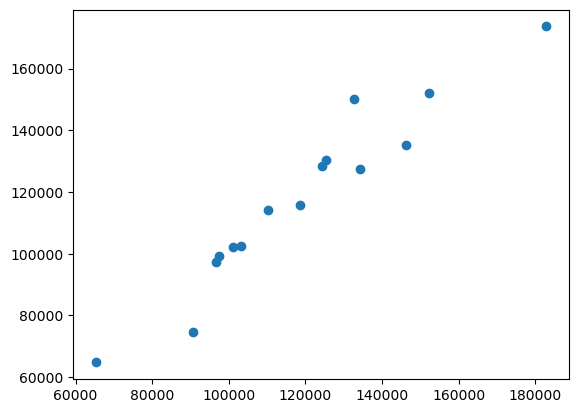

In [15]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test)
plt.xlable("act value")
plt.ylable("pred value")
plt.show()

In [61]:
##calculating the r2 score to check the strength of the model

r2=r2_score(y_test,y_pred_test)
print("the strength of the model is -",r2)

the strength of the model is - 0.9246078775497942


In [62]:
## saving the model by using Joblib
import joblib

In [64]:
filename = 'joblib_startup_model.sav'
joblib.dump(model,filename)

['joblib_startup_model.sav']